In [0]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

In [0]:
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [5]:
#reading graph
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_woheader.csv'):  
    traincsv = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of diplicate entries: ",sum(traincsv.duplicated()))
    traincsv.to_csv('data/after_eda/train_woheader.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g=nx.read_edgelist('/content/drive/My Drive/Documents/Fb/Copy of train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


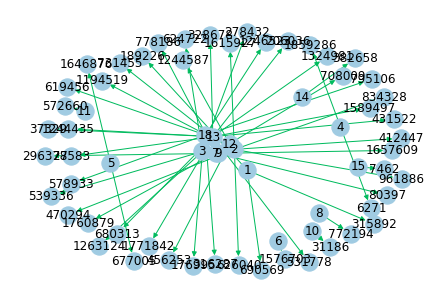

In [6]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train.csv', nrows=50).to_csv('train_woheader_sample.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

##1. Exploratory Data Analysis

In [7]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


##1.1 No of followers for each person

#####1.Here we are using in_degree S.T it tells no:of edges points towards each user from that we can know followers for each person

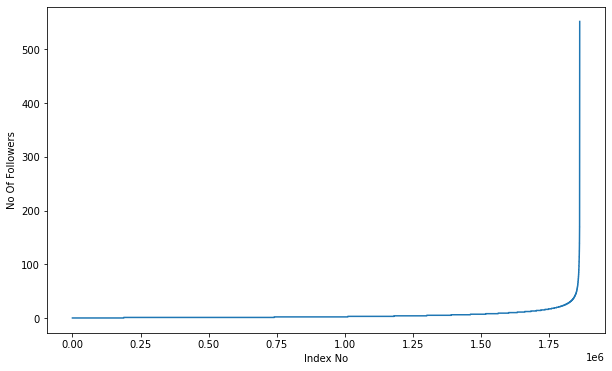

In [9]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

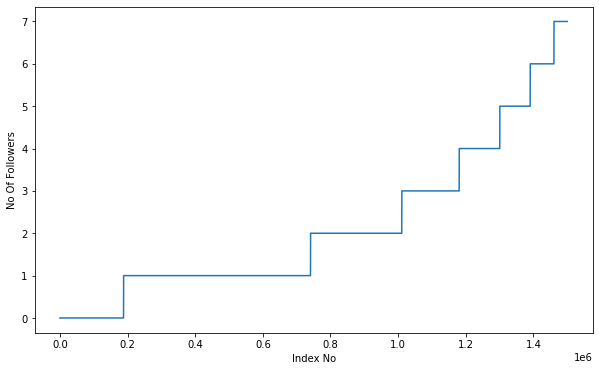

In [10]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

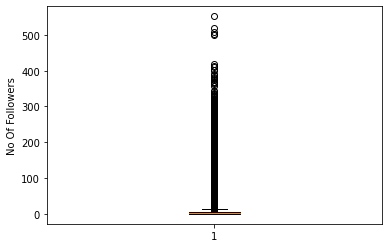

In [11]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [12]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


From above we can observe that 99% of users having only 40 followers

In [13]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


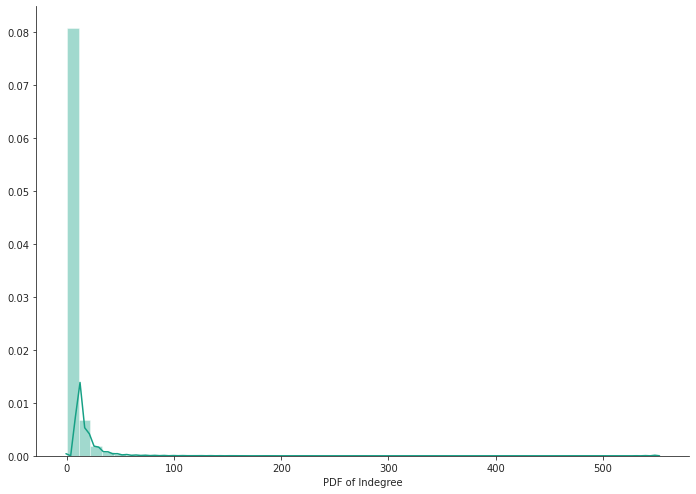

In [14]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

###1.2 No of people each person is following

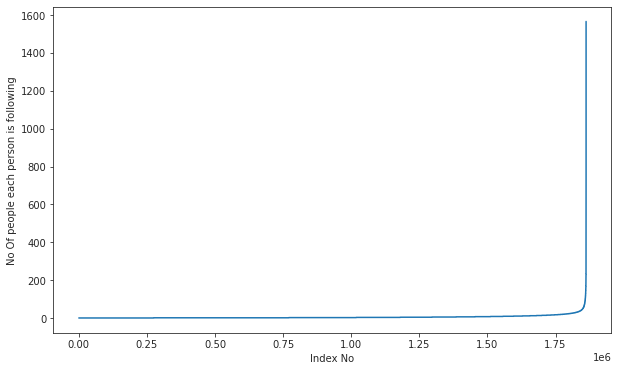

In [15]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

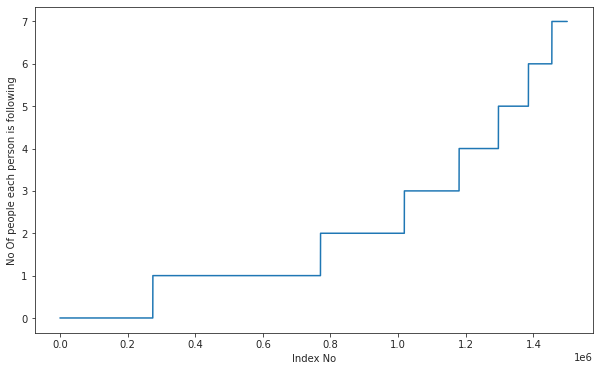

In [16]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

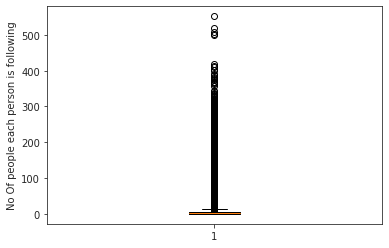

In [17]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [18]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [19]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


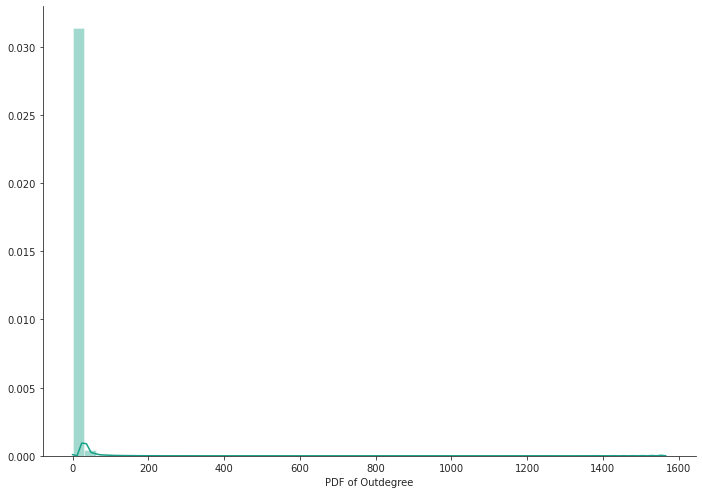

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [21]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [22]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [23]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


In [0]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

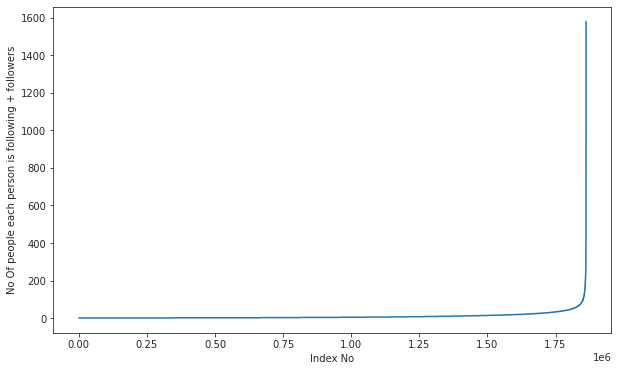

In [25]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

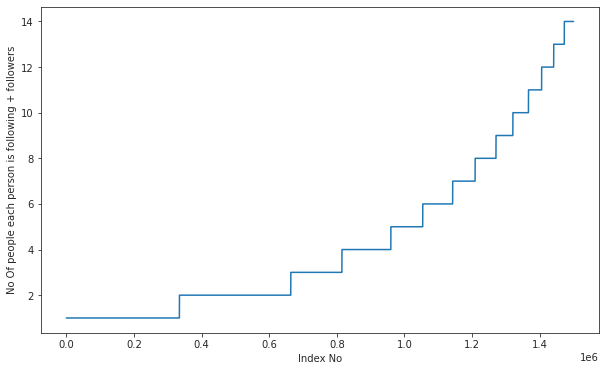

In [26]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [27]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [28]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [29]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [30]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [31]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


In [32]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


##2. Posing a problem as classification problem

###2.1 Generating some edges which are not present in graph for supervised learning

Generated Bad links from graph which are not in graph and whose shortest path is greater than 2.


In [33]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('/content/drive/My Drive/Documents/Fb/Copy of train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('/content/drive/My Drive/Documents/Fb/Copy of missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('/content/drive/My Drive/Documents/Fb/Copy of missing_edges_final.p','rb'))

CPU times: user 2.14 s, sys: 2.19 s, total: 4.32 s
Wall time: 4.45 s


In [34]:
len(missing_edges)

9437519

##2.2 Training and Test data split:

Removed edges from Graph and used as test data and after removing used that graph for creating features for Train and test data


In [0]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv')) and (not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('/content/drive/My Drive/Documents/Fb/Copy of test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('/content/drive/My Drive/Documents/Fb/Copy of train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('/content/drive/My Drive/Documents/Fb/Copy of test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges

In [36]:
if (os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv')) and (os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('/content/drive/My Drive/Documents/Fb/Copy of test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


In [0]:
#final train and test data sets
if (not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_after_eda.csv')) and \
(not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of test_after_eda.csv')) and \
(not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_y.csv')) and \
(not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of test_y.csv')) and \
(os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv')) and \
(os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of test_pos_after_eda.csv')) and \
(os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_neg_after_eda.csv')) and \
(os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('/content/drive/My Drive/Documents/Fb/Copy of train_after_eda.csv',header=False,index=False)
    X_test.to_csv('/content/drive/My Drive/Documents/Fb/Copy of test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('/content/drive/My Drive/Documents/Fb/Copy of train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('/content/drive/My Drive/Documents/Fb/Copy of test_y.csv',header=False,index=False)

In [0]:
X_train=pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train_after_eda.csv')
X_test=pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of test_after_eda.csv')
y_train=pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train_y.csv')
y_test=pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of test_y.csv')

In [42]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100029, 2)
Data points in test data (3775007, 2)
Shape of traget variable in train (15100029, 1)
Shape of traget variable in test (3775007, 1)


##1. Reading Data

In [63]:
if os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('/content/drive/My Drive/Documents/Fb/Copy of train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


##2. Similarity measures

###2.1 Jaccard Distance:

𝑗=|𝑋∩𝑌|/|𝑋∪𝑌|

In [0]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [7]:
#one test case
print(jaccard_for_followees(273084,1505602))

0.0


In [8]:
#node 1635354 not in graph 
print(jaccard_for_followees(273084,1505602))

0.0


In [0]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [10]:
print(jaccard_for_followers(273084,470294))

0


In [11]:
#node 1635354 not in graph 
print(jaccard_for_followees(669354,1635354))

0


###2.2 Cosine distance

In [0]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [13]:
print(cosine_for_followees(273084,1505602))

0.0


In [14]:
print(cosine_for_followees(273084,1635354))

0


In [0]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [65]:
print(cosine_for_followers(2,470294))

0.02886751345948129


In [66]:
print(cosine_for_followers(669354,1635354))

0


###3. Ranking Measures

####3.1 Page Ranking

In [0]:
pr = pickle.load(open('/content/drive/My Drive/Documents/Fb/Copy of page_rank.p','rb'))

In [3]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.6556497245737814e-07
max 2.7098251341935827e-05
mean 5.615699699389075e-07


In [4]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


##4. Other Graph Features

####4.1 Shortest path:

Getting Shortest path between twoo nodes, if nodes have direct path i.e directly connected then we are removing that edge and calculating path. 

In [0]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [68]:
#testing
compute_shortest_path_length(77697, 826021)

10

In [69]:
#testing
compute_shortest_path_length(669354,1635354)

-1

##4.2 Checking for same community

In [0]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

In [11]:
belongs_to_same_wcc(861, 1659750)

0

In [12]:
belongs_to_same_wcc(669354,1635354)

0

###4.3 Adamic/Adar Index:

In [0]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [14]:
calc_adar_in(1,189226)

0

In [15]:
calc_adar_in(669354,1635354)

0

###4.4 Is persion was following back:

In [0]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [17]:
follows_back(1,189226)

1

In [18]:
follows_back(669354,1635354)

0

##4.5 Katz Centrality:

In [0]:
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of katz.p'):
    katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
    pickle.dump(katz,open('data/fea_sample/katz.p','wb'))
else:
    katz = pickle.load(open('/content/drive/My Drive/Documents/Fb/Copy of katz.p','rb'))

In [20]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.0007313532484065916
max 0.003394554981699122
mean 0.0007483800935562018


In [21]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0007483800935562018


##4.6 Hits Score

In [0]:
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    pickle.dump(hits,open('data/fea_sample/hits.p','wb'))
else:
    hits = pickle.load(open('/content/drive/My Drive/Documents/Fb/Copy of hits.p','rb'))

In [23]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min 0.0
max 0.004868653378780953
mean 5.615699699344123e-07


##5. Featurization

###5.1 Reading a sample of Data from both train and test

In [0]:
import random
if os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of train_after_eda.csv'):
    filename = "/content/drive/My Drive/Documents/Fb/Copy of train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    #https://stackoverflow.com/a/22259008/4084039

In [0]:
if os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of test_after_eda.csv'):
    filename = "/content/drive/My Drive/Documents/Fb/Copy of test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #https://stackoverflow.com/a/22259008/4084039

In [26]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


In [27]:
df_final_train = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,425049,1307553,1


In [28]:
df_final_test = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('/content/drive/My Drive/Documents/Fb/Copy of test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,249497,989757,1


##5.2 Adding a set of features



we will create these each of these features for both train and test data points

    jaccard_followers
    jaccard_followees
    cosine_followers
    cosine_followees
    num_followers_s
    num_followees_s
    num_followers_d
    num_followees_d
    inter_followers
    inter_followees


In [0]:
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage1.h5'):
    #mapping jaccrd followers to train and test data
    df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

        #mapping jaccrd followers to train and test data
    df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [0]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

In [0]:
if os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()


In [0]:
df_final_train = read_hdf('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage1.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage1.h5', 'test_df',mode='r')

In [75]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,48,6
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,13348,94
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,616,28
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,77,11
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,3,1


5.3 Adding new set of features

we will create these each of these features for both train and test data points

    adar index
    is following back
    belongs to same weakly connect components
    shortest path between source and destination


In [0]:
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage2.h5'):
    #mapping adar index on train
    df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    #mapping adar index on test
    df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
    df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping followback or not on test
    df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping same component of wcc or not on train
    df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    ##mapping same component of wcc or not on train
    df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
    
    #--------------------------------------------------------------------------------------------------------
    #mapping shortest path on train 
    df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    #mapping shortest path on test
    df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

    hdf = HDFStore('data/fea_sample/storage_sample_stage2.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage2.h5', 'train_df',mode='r')
    df_final_test = read_hdf('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage2.h5', 'test_df',mode='r')

5.4 Adding new set of features

we will create these each of these features for both train and test data points

    Weight Features
        weight of incoming edges
        weight of outgoing edges
        weight of incoming edges + weight of outgoing edges
        weight of incoming edges * weight of outgoing edges
        2*weight of incoming edges + weight of outgoing edges
        weight of incoming edges + 2*weight of outgoing edges
    Page Ranking of source
    Page Ranking of dest
    katz of source
    katz of dest
    hubs of source
    hubs of dest
    authorities_s of source
    authorities_s of dest


In [40]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 1780722/1780722 [00:19<00:00, 89920.39it/s] 


In [0]:
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage3.h5'):
    #mapping to pandas train
    df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

    #mapping to pandas test
    df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


    #some features engineerings on the in and out weights
    df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
    df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
    df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
    df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

    #some features engineerings on the in and out weights
    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [0]:
if not os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then adding 0
    df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage3.h5', 'test_df',mode='r')

5.5 Adding new set of features

we will create these each of these features for both train and test data points

    SVD features for both source and destination


In [0]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [0]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [0]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [46]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [0]:
if os.path.isfile('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage4.h5'):
    #===================================================================================================
    
    df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================
    
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #===================================================================================================
    
    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================

    hdf = HDFStore('/content/drive/My Drive/Documents/Fb/Copy of storage_sample_stage4.h5.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()

##Adding new feature Preferential Attachement

Here it visualized as let A,B,C with some edges individually now to connect from A to B or C how it goes in this?
if A want to link with B or c then A calculates the no:of edges such that A chooses node with more no:of edges.Let say B has more no:of edges then C then A links with B then C 

So,in the above process Preferential attachment works


In [92]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d,preferential_followees,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,66,6,120,-1.666334e-13,4.613820e-13,1.043041e-05,6.678033e-13,2.451105e-13,3.584945e-12,-2.038018e-11,5.397910e-13,1.068943e-06,1.192461e-12,2.279488e-12,3.581202e-12,-7.216151e-13,3.926263e-13,1.983700e-06,1.545089e-13,8.108438e-13,1.719704e-14,-1.355369e-12,4.675320e-13,1.128586e-06,6.616718e-14,9.771079e-13,4.160011e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,1598,94,8662,7.050288e-13,-8.250565e-11,-1.717854e-10,3.705016e-02,1.032400e-11,7.207497e-10,1.644234e-12,-2.047753e-10,-3.944289e-10,8.617541e-02,2.399560e-11,1.738682e-09,2.685584e-13,-3.316850e-11,-6.236601e-11,1.345726e-02,3.703502e-12,2.251737e-10,1.244947e-12,-1.636948e-10,-3.112927e-10,6.738902e-02,2.607852e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,980,28,902,3.755459e-18,1.444906e-18,-3.748461e-19,4.427801e-19,1.256575e-18,-2.792007e-19,2.118605e-18,4.360051e-19,-7.019683e-19,6.497078e-19,3.376793e-19,-9.309591e-19,1.197616e-18,3.743722e-19,-1.225475e-19,2.253949e-19,2.800161e-19,-2.177272e-19,9.735484e-19,3.313804e-19,-1.028580e-19,1.498337e-19,2.350729e-19,-1.788242e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,22,11,35,-9.965437e-12,4.077155e-13,5.084146e-10,1.985282e-14,2.471968e-12,1.004207e-15,-2.629045e-13,1.428994e-11,9.146742e-11,8.590145e-12,2.406658e-10,7.638161e-15,-2.171122e-13,5.206523e-13,6.058721e-11,1.514753e-11,1.513498e-12,4.498074e-13,-9.818087e-10,3.454680e-11,5.214019e-08,9.595841e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5,1,33,-3.409312e-13,1.125340e-13,3.191174e-07,8.551628e-14,1.405448e-13,7.172962e-15,-2.550196e-13,2.424806e-13,2.436435e-07,3.680001e-14,1.348532e-13,8.710720e-15,-4.795521e-13,1.521359e-13,1.197278e-07,1.999880e-14,3.360426e-13,1.407670e-14,-3.453530e-15,1.121300e-15,3.097681e-09,8.173269e-16,1.122942e-15,5.096081e-17


To calculate preferentail attachment we need no:of followers of source and destination


Preferential Attachement for followers

In [0]:
nf_source=np.array(df_final_train['num_followers_s'])   #getting values of follwers of source
nf_destination=np.array(df_final_train['num_followers_d'])   #getting values of follwers of destination
preferential_followers=[]
for i in range(len(nf_source)):
    preferential_followers.append(nf_destination[i]*nf_source[i])  
df_final_train['preferential_followers']= preferential_followers

In [83]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,66,6
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,1598,94
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,980,28
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,22,11
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5,1


In [0]:
#for test dataset
nf_source_test=np.array(df_final_test['num_followers_s'])
nf_destination_test=np.array(df_final_test['num_followers_d'])
preferential_followers=[]
for i in range(len(nf_source_test)):
    preferential_followers.append(nf_destination_test[i]*nf_source_test[i])
df_final_test['preferential_followers']= preferential_followers

In [85]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d
0,848424,784690,1,0,0.0,0.029161,0.000000,6,6,9,1,0,0.000000,1,1,2,0.258199,0.377964,0.636163,0.097590,0.894362,1.014128,6.557971e-07,0.000002,0.000754,0.000786,3.243237e-16,1.745627e-16,2.969838e-15,9.269213e-14,84,14
1,483294,1255532,1,0,0.0,0.000000,0.000000,2,1,19,0,0,0.000000,1,1,7,0.235702,0.707107,0.942809,0.166667,1.178511,1.649916,2.172064e-07,0.000001,0.000739,0.000801,1.702625e-19,2.706300e-15,2.522357e-16,5.277458e-15,34,17
2,626190,1729265,1,0,0.0,0.000000,0.000000,15,16,9,0,0,0.000000,0,1,5,0.301511,0.242536,0.544047,0.073127,0.845558,0.786583,1.853369e-06,0.000002,0.000789,0.000770,9.426796e-14,4.116616e-16,2.253244e-15,2.079387e-15,150,10
3,947219,425228,1,0,0.0,0.000000,0.000000,11,10,34,0,0,0.000000,0,1,3,0.162221,0.301511,0.463733,0.048912,0.625954,0.765244,7.000791e-07,0.000002,0.000778,0.000884,9.876114e-14,1.039593e-13,1.511694e-14,3.478438e-14,407,37
4,991374,975044,1,0,0.2,0.042767,0.347833,12,15,27,4,7,6.136433,0,1,2,0.188982,0.250000,0.438982,0.047246,0.627964,0.688982,7.103008e-07,0.000001,0.000779,0.000840,1.557332e-15,1.096037e-14,5.180869e-15,1.296135e-14,324,27



Preferential Attachement for followees

In [0]:
#for train dataset
nf_source1=np.array(df_final_train['num_followees_s'])
nf_destination1=np.array(df_final_train['num_followees_d'])
preferential_followees=[]
for i in range(len(nf_source1)):
    preferential_followees.append(nf_destination1[i]*nf_source1[i])
df_final_train['preferential_followees']= preferential_followees

In [87]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d,preferential_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,66,6,120
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,1598,94,8662
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,980,28,902
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,22,11,35
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5,1,33


In [0]:
#for test dataset
nf_source_test1=np.array(df_final_test['num_followees_s'])
nf_destination_test1=np.array(df_final_test['num_followees_d'])
preferential_followees=[]
for i in range(len(nf_source_test1)):
    preferential_followees.append(nf_destination_test1[i]*nf_source_test1[i])
df_final_test['preferential_followees']= preferential_followees

In [89]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d,preferential_followees
0,848424,784690,1,0,0.0,0.029161,0.000000,6,6,9,1,0,0.000000,1,1,2,0.258199,0.377964,0.636163,0.097590,0.894362,1.014128,6.557971e-07,0.000002,0.000754,0.000786,3.243237e-16,1.745627e-16,2.969838e-15,9.269213e-14,84,14,54
1,483294,1255532,1,0,0.0,0.000000,0.000000,2,1,19,0,0,0.000000,1,1,7,0.235702,0.707107,0.942809,0.166667,1.178511,1.649916,2.172064e-07,0.000001,0.000739,0.000801,1.702625e-19,2.706300e-15,2.522357e-16,5.277458e-15,34,17,19
2,626190,1729265,1,0,0.0,0.000000,0.000000,15,16,9,0,0,0.000000,0,1,5,0.301511,0.242536,0.544047,0.073127,0.845558,0.786583,1.853369e-06,0.000002,0.000789,0.000770,9.426796e-14,4.116616e-16,2.253244e-15,2.079387e-15,150,10,144
3,947219,425228,1,0,0.0,0.000000,0.000000,11,10,34,0,0,0.000000,0,1,3,0.162221,0.301511,0.463733,0.048912,0.625954,0.765244,7.000791e-07,0.000002,0.000778,0.000884,9.876114e-14,1.039593e-13,1.511694e-14,3.478438e-14,407,37,340
4,991374,975044,1,0,0.2,0.042767,0.347833,12,15,27,4,7,6.136433,0,1,2,0.188982,0.250000,0.438982,0.047246,0.627964,0.688982,7.103008e-07,0.000001,0.000779,0.000840,1.557332e-15,1.096037e-14,5.180869e-15,1.296135e-14,324,27,405


##Adding feature svd_dot

Svd_dot is defined as dot product between souce nodes of svd and destination nodes of svd 


In [93]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d,preferential_followees,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,66,6,120,-1.666334e-13,4.613820e-13,1.043041e-05,6.678033e-13,2.451105e-13,3.584945e-12,-2.038018e-11,5.397910e-13,1.068943e-06,1.192461e-12,2.279488e-12,3.581202e-12,-7.216151e-13,3.926263e-13,1.983700e-06,1.545089e-13,8.108438e-13,1.719704e-14,-1.355369e-12,4.675320e-13,1.128586e-06,6.616718e-14,9.771079e-13,4.160011e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,1598,94,8662,7.050288e-13,-8.250565e-11,-1.717854e-10,3.705016e-02,1.032400e-11,7.207497e-10,1.644234e-12,-2.047753e-10,-3.944289e-10,8.617541e-02,2.399560e-11,1.738682e-09,2.685584e-13,-3.316850e-11,-6.236601e-11,1.345726e-02,3.703502e-12,2.251737e-10,1.244947e-12,-1.636948e-10,-3.112927e-10,6.738902e-02,2.607852e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,980,28,902,3.755459e-18,1.444906e-18,-3.748461e-19,4.427801e-19,1.256575e-18,-2.792007e-19,2.118605e-18,4.360051e-19,-7.019683e-19,6.497078e-19,3.376793e-19,-9.309591e-19,1.197616e-18,3.743722e-19,-1.225475e-19,2.253949e-19,2.800161e-19,-2.177272e-19,9.735484e-19,3.313804e-19,-1.028580e-19,1.498337e-19,2.350729e-19,-1.788242e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,22,11,35,-9.965437e-12,4.077155e-13,5.084146e-10,1.985282e-14,2.471968e-12,1.004207e-15,-2.629045e-13,1.428994e-11,9.146742e-11,8.590145e-12,2.406658e-10,7.638161e-15,-2.171122e-13,5.206523e-13,6.058721e-11,1.514753e-11,1.513498e-12,4.498074e-13,-9.818087e-10,3.454680e-11,5.214019e-08,9.595841e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5,1,33,-3.409312e-13,1.125340e-13,3.191174e-07,8.551628e-14,1.405448e-13,7.172962e-15,-2.550196e-13,2.424806e-13,2.436435e-07,3.680001e-14,1.348532e-13,8.710720e-15,-4.795521e-13,1.521359e-13,1.197278e-07,1.999880e-14,3.360426e-13,1.407670e-14,-3.453530e-15,1.121300e-15,3.097681e-09,8.173269e-16,1.122942e-15,5.096081e-17


In [0]:
#for train dataset

s1=df_final_train['svd_u_s_1']
s2=df_final_train['svd_u_s_2']
s3=df_final_train['svd_u_s_3']
s4=df_final_train['svd_u_s_4']
s5=df_final_train['svd_u_s_5']
s6=df_final_train['svd_u_s_6']
s7=df_final_train['svd_v_s_1']
s8=df_final_train['svd_v_s_2']
s9=df_final_train['svd_v_s_3']
s10=df_final_train['svd_v_s_4']
s11=df_final_train['svd_v_s_5']
s12=df_final_train['svd_v_s_6']

d1=df_final_train['svd_u_d_1']
d2=df_final_train['svd_u_d_2']
d3=df_final_train['svd_u_d_3']
d4=df_final_train['svd_u_d_4']
d5=df_final_train['svd_u_d_5']
d6=df_final_train['svd_u_d_6']
d7=df_final_train['svd_v_d_1']
d8=df_final_train['svd_v_d_2']
d9=df_final_train['svd_v_d_3']
d10=df_final_train['svd_v_d_4']
d11=df_final_train['svd_v_d_5']
d12=df_final_train['svd_v_d_6']

In [0]:
svd_dot=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot.append(np.dot(a,b))
df_final_train['svd_dot']=svd_dot

In [0]:
#for test data

st1=df_final_test['svd_u_s_1']
st2=df_final_test['svd_u_s_2']
st3=df_final_test['svd_u_s_3']
st4=df_final_test['svd_u_s_4']
st5=df_final_test['svd_u_s_5']
st6=df_final_test['svd_u_s_6']
st7=df_final_test['svd_v_s_1']
st8=df_final_test['svd_v_s_2']
st9=df_final_test['svd_v_s_3']
st10=df_final_test['svd_v_s_4']
st11=df_final_test['svd_v_s_5']
st12=df_final_test['svd_v_s_6']

dt1=df_final_test['svd_u_d_1']
dt2=df_final_test['svd_u_d_2']
dt3=df_final_test['svd_u_d_3']
dt4=df_final_test['svd_u_d_4']
dt5=df_final_test['svd_u_d_5']
dt6=df_final_test['svd_u_d_6']
dt7=df_final_test['svd_v_d_1']
dt8=df_final_test['svd_v_d_2']
dt9=df_final_test['svd_v_d_3']
dt10=df_final_test['svd_v_d_4']
dt11=df_final_test['svd_v_d_5']
dt12=df_final_test['svd_v_d_6']

In [100]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d,preferential_followees,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,66,6,120,-1.666334e-13,4.613820e-13,1.043041e-05,6.678033e-13,2.451105e-13,3.584945e-12,-2.038018e-11,5.397910e-13,1.068943e-06,1.192461e-12,2.279488e-12,3.581202e-12,-7.216151e-13,3.926263e-13,1.983700e-06,1.545089e-13,8.108438e-13,1.719704e-14,-1.355369e-12,4.675320e-13,1.128586e-06,6.616718e-14,9.771079e-13,4.160011e-14,1.338828e-11
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,1598,94,8662,7.050288e-13,-8.250565e-11,-1.717854e-10,3.705016e-02,1.032400e-11,7.207497e-10,1.644234e-12,-2.047753e-10,-3.944289e-10,8.617541e-02,2.399560e-11,1.738682e-09,2.685584e-13,-3.316850e-11,-6.236601e-11,1.345726e-02,3.703502e-12,2.251737e-10,1.244947e-12,-1.636948e-10,-3.112927e-10,6.738902e-02,2.607852e-11,2.372904e-09,4.099684e-03
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,980,28,902,3.755459e-18,1.444906e-18,-3.748461e-19,4.427801e-19,1.256575e-18,-2.792007e-19,2.118605e-18,4.360051e-19,-7.019683e-19,6.497078e-19,3.376793e-19,-9.309591e-19,1.197616e-18,3.743722e-19,-1.225475e-19,2.253949e-19,2.800161e-19,-2.177272e-19,9.735484e-19,3.313804e-19,-1.028580e-19,1.498337e-19,2.350729e-19,-1.788242e-19,1.126251e-35
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,22,11,35,-9.965437e-12,4.077155e-13,5.084146e-10,1.985282e-14,2.471968e-12,1.004207e-15,-2.629045e-13,1.428994e-11,9.146742e-11,8.590145e-12,2.406658e-10,7.638161e-15,-2.171122e-13,5.206523e-13,6.058721e-11,1.514753e-11,1.513498e-12,4.498074e-13,-9.818087e-10,3.454680e-11,5.214019e-08,9.595841e-13,3.047045e-10,1.246592e-13,3.206842e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5,1,33,-3.409312e-13,1.125340e-13,3.191174e-07,8.551628e-14,1.405448e-13,7.172962e-15,-2.550196e-13,2.424806e-13,2.436435e-07,3.680001e-14,1.348532e-13,8.710720e-15,-4.795521e-13,1.521359e-13,1.197278e-07,1.999880e-14,3.360426e-13,1.407670e-14,-3.453530e-15,1.121300e-15,3.097681e-09,8.173269e-16,1.122942e-15,5.096081e-17,7.812176e-14


In [0]:
svd_dot=[]
for i in range(len(np.array(st1))):
    a=[]
    b=[]
    a.append(np.array(st1[i]))
    a.append(np.array(st2[i]))
    a.append(np.array(st3[i]))
    a.append(np.array(st4[i]))
    a.append(np.array(st5[i]))
    a.append(np.array(st6[i]))
    a.append(np.array(st7[i]))
    a.append(np.array(st8[i]))
    a.append(np.array(st9[i]))
    a.append(np.array(st10[i]))
    a.append(np.array(st11[i]))
    a.append(np.array(st12[i]))
    b.append(np.array(dt1[i]))
    b.append(np.array(dt2[i]))
    b.append(np.array(dt3[i]))
    b.append(np.array(dt4[i]))
    b.append(np.array(dt5[i]))
    b.append(np.array(dt6[i]))
    b.append(np.array(dt7[i]))
    b.append(np.array(dt8[i]))
    b.append(np.array(dt9[i]))
    b.append(np.array(dt10[i]))
    b.append(np.array(dt11[i]))
    b.append(np.array(dt12[i]))
    svd_dot.append(np.dot(a,b))
df_final_test['svd_dot']=svd_dot

In [101]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d,preferential_followees,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_dot
0,848424,784690,1,0,0.0,0.029161,0.000000,6,6,9,1,0,0.000000,1,1,2,0.258199,0.377964,0.636163,0.097590,0.894362,1.014128,6.557971e-07,0.000002,0.000754,0.000786,3.243237e-16,1.745627e-16,2.969838e-15,9.269213e-14,84,14,54,-9.987979e-12,2.283696e-13,1.439960e-10,6.136173e-13,4.188172e-13,5.983632e-15,-1.026186e-11,5.316645e-13,5.843192e-10,1.166048e-13,2.253356e-11,3.220618e-15,-2.148852e-13,1.883259e-13,5.904813e-11,2.701538e-12,4.341620e-13,5.535504e-14,-9.994077e-10,5.791914e-10,3.512351e-07,2.486660e-09,2.771146e-09,1.727695e-12,2.083227e-17
1,483294,1255532,1,0,0.0,0.000000,0.000000,2,1,19,0,0,0.000000,1,1,7,0.235702,0.707107,0.942809,0.166667,1.178511,1.649916,2.172064e-07,0.000001,0.000739,0.000801,1.702625e-19,2.706300e-15,2.522357e-16,5.277458e-15,34,17,19,-2.079271e-15,7.009789e-16,6.970671e-10,9.562491e-15,1.728774e-15,3.062102e-18,-1.960465e-11,2.861620e-11,1.939769e-08,1.907404e-12,3.797447e-11,4.992975e-14,-4.054500e-13,2.895772e-13,2.545371e-10,2.248602e-14,3.601010e-13,4.701442e-15,-9.360663e-12,3.206811e-10,4.668669e-08,6.665782e-12,1.495980e-10,9.836693e-14,2.540514e-17
2,626190,1729265,1,0,0.0,0.000000,0.000000,15,16,9,0,0,0.000000,0,1,5,0.301511,0.242536,0.544047,0.073127,0.845558,0.786583,1.853369e-06,0.000002,0.000789,0.000770,9.426796e-14,4.116616e-16,2.253244e-15,2.079387e-15,150,10,144,-1.782380e-11,2.389626e-11,1.443051e-06,2.358032e-12,2.689639e-12,1.739179e-12,-1.863945e-13,1.806795e-13,2.544592e-07,1.693298e-13,2.712751e-13,7.594780e-15,-4.148333e-13,4.618813e-12,1.122147e-05,1.778932e-12,2.740539e-13,4.199839e-14,-4.253081e-13,4.789464e-13,3.479854e-07,1.630554e-13,3.954763e-13,3.875785e-14,4.272104e-12
3,947219,425228,1,0,0.0,0.000000,0.000000,11,10,34,0,0,0.000000,0,1,3,0.162221,0.301511,0.463733,0.048912,0.625954,0.765244,7.000791e-07,0.000002,0.000778,0.000884,9.876114e-14,1.039593e-13,1.511694e-14,3.478438e-14,407,37,340,-4.491249e-11,9.917542e-13,7.891237e-06,9.458631e-12,2.715849e-11,1.822075e-12,-1.070734e-10,2.888085e-12,2.070700e-05,7.229382e-12,3.563661e-11,1.917977e-12,-8.942576e-12,5.535692e-12,5.223671e-06,7.917208e-13,4.020726e-12,2.817658e-13,-2.162598e-11,6.939286e-12,1.879855e-05,4.384839e-12,1.239415e-11,6.483488e-13,2.616013e-10
4,991374,975044,1,0,0.2,0.042767,0.347833,12,15,27,4,7,6.136433,0,1,2,0.188982,0.250000,0.438982,0.047246,0.627964,0.688982,7.103008e-07,0.000001,0.000779,0.000840,1.557332e-15,1.096037e-14,5.180869e-15,1.296135e-14,324,27,405,-9.778566e-13,5.724665e-13,4.951878e-06,1.396839e-12,2.153250e-11,2.873133e-14,-2.275782e-11,1.007625e-12,2.517620e-06,1.394103e-10,2.961999e-11,2.022109e-13,-3.804983e-12,1.593137e-13,1.035013e-06,1.361586e-13,1.154625e-12,9.656659e-14,-8.742939e-12,7.467395e-12,1.256876e-05,3.637116e-12,3.948478e-12,2.415875e-13,2.547578e-11


In [0]:
hdf = HDFStore('storage_sample_stage4.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [0]:
df_final_train = read_hdf('/content/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/storage_sample_stage4.h5', 'test_df',mode='r')

In [105]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,preferential_followers,num_followers_d,preferential_followees,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,66,6,120,-1.666334e-13,4.613820e-13,1.043041e-05,6.678033e-13,2.451105e-13,3.584945e-12,-2.038018e-11,5.397910e-13,1.068943e-06,1.192461e-12,2.279488e-12,3.581202e-12,-7.216151e-13,3.926263e-13,1.983700e-06,1.545089e-13,8.108438e-13,1.719704e-14,-1.355369e-12,4.675320e-13,1.128586e-06,6.616718e-14,9.771079e-13,4.160011e-14,1.338828e-11
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,1598,94,8662,7.050288e-13,-8.250565e-11,-1.717854e-10,3.705016e-02,1.032400e-11,7.207497e-10,1.644234e-12,-2.047753e-10,-3.944289e-10,8.617541e-02,2.399560e-11,1.738682e-09,2.685584e-13,-3.316850e-11,-6.236601e-11,1.345726e-02,3.703502e-12,2.251737e-10,1.244947e-12,-1.636948e-10,-3.112927e-10,6.738902e-02,2.607852e-11,2.372904e-09,4.099684e-03
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,980,28,902,3.755459e-18,1.444906e-18,-3.748461e-19,4.427801e-19,1.256575e-18,-2.792007e-19,2.118605e-18,4.360051e-19,-7.019683e-19,6.497078e-19,3.376793e-19,-9.309591e-19,1.197616e-18,3.743722e-19,-1.225475e-19,2.253949e-19,2.800161e-19,-2.177272e-19,9.735484e-19,3.313804e-19,-1.028580e-19,1.498337e-19,2.350729e-19,-1.788242e-19,1.126251e-35
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,22,11,35,-9.965437e-12,4.077155e-13,5.084146e-10,1.985282e-14,2.471968e-12,1.004207e-15,-2.629045e-13,1.428994e-11,9.146742e-11,8.590145e-12,2.406658e-10,7.638161e-15,-2.171122e-13,5.206523e-13,6.058721e-11,1.514753e-11,1.513498e-12,4.498074e-13,-9.818087e-10,3.454680e-11,5.214019e-08,9.595841e-13,3.047045e-10,1.246592e-13,3.206842e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5,1,33,-3.409312e-13,1.125340e-13,3.191174e-07,8.551628e-14,1.405448e-13,7.172962e-15,-2.550196e-13,2.424806e-13,2.436435e-07,3.680001e-14,1.348532e-13,8.710720e-15,-4.795521e-13,1.521359e-13,1.197278e-07,1.999880e-14,3.360426e-13,1.407670e-14,-3.453530e-15,1.121300e-15,3.097681e-09,8.173269e-16,1.122942e-15,5.096081e-17,7.812176e-14


In [106]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'preferential_followers', 'num_followers_d',
       'preferential_followees', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3',
       'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1',
       'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',
       'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5',
       'svd_v_d_6', 'svd_dot'],
      dtype='object')

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9147544781541896 test Score 0.8957333790267307
Estimators =  50 Train Score 0.9204558487733165 test Score 0.9153230872314585
Estimators =  100 Train Score 0.9206687788199128 test Score 0.9159408122573198
Estimators =  250 Train Score 0.9207242450550714 test Score 0.9160087350915506
Estimators =  450 Train Score 0.9215860690477934 test Score 0.9169817662381312


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

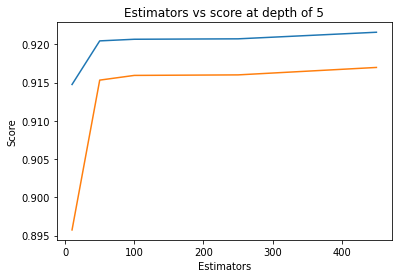

In [109]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9061355075081272 test Score 0.8908923566079572
depth =  9 Train Score 0.9565439411734669 test Score 0.9239721695129665
depth =  11 Train Score 0.9612096102682833 test Score 0.9245886462147035
depth =  15 Train Score 0.9633949671883398 test Score 0.9257926739464327
depth =  20 Train Score 0.9637367769182351 test Score 0.9264665613480779
depth =  35 Train Score 0.9635786119483261 test Score 0.9264554163596169
depth =  50 Train Score 0.9635786119483261 test Score 0.9264554163596169
depth =  70 Train Score 0.9635786119483261 test Score 0.9264554163596169
depth =  130 Train Score 0.9635786119483261 test Score 0.9264554163596169


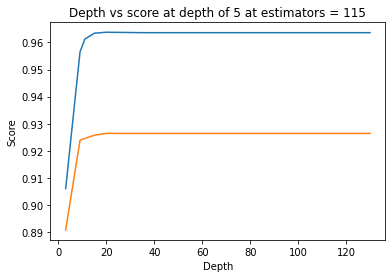

In [110]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [113]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96195894 0.96157185 0.96018273 0.96132496 0.96308062]
mean train scores [0.96306543 0.96239808 0.96085992 0.96231095 0.96427386]


In [114]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [117]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9646244136222406
Test f1 score 0.9269968387776607


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


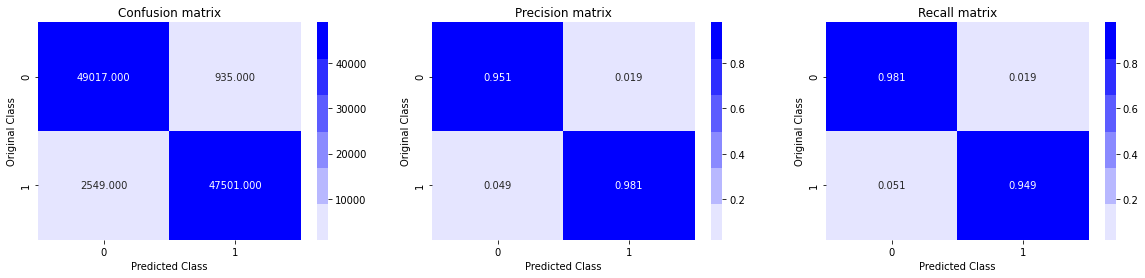

Test confusion_matrix


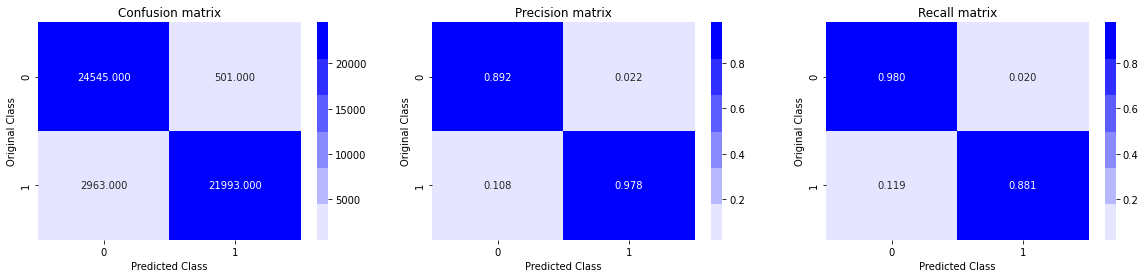

In [119]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

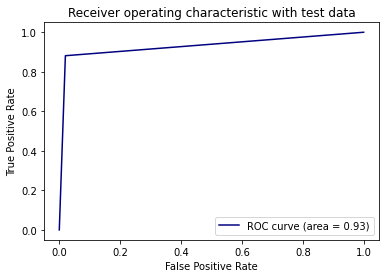

In [120]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

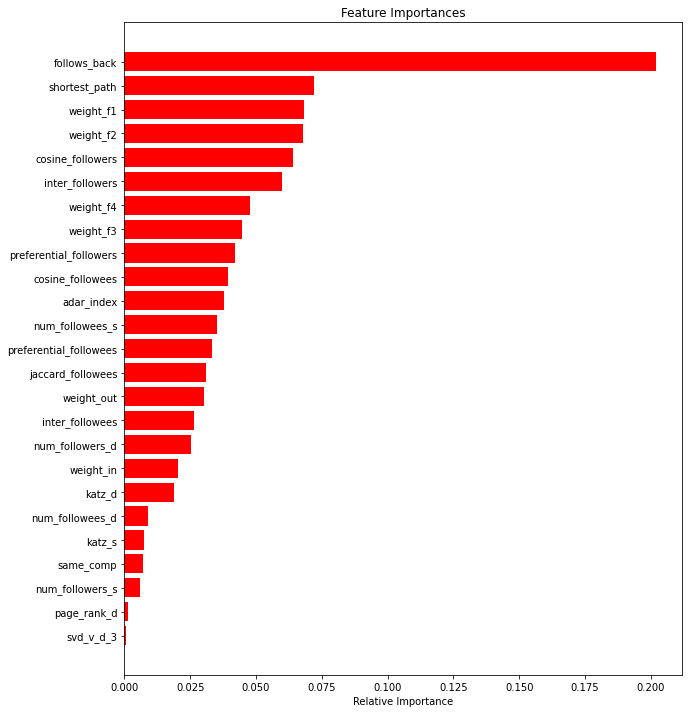

In [121]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###Applying XGBOOST

In [124]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)
              }
model = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1',random_state=25,return_train_score=True)


model.fit(df_final_train,y_train)
print('mean test scores',model.cv_results_['mean_test_score'])
print('mean train scores',model.cv_results_['mean_train_score'])

mean test scores [0.97972794 0.97986892 0.97991414 0.97996131 0.98003046]
mean train scores [0.99999001 1.         0.99433756 0.99699508 0.99735128]


In [125]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=112, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [0]:
clf1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=112, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
clf1.fit(df_final_train,y_train)
y_train_pred = clf1.predict(df_final_train)
y_test_pred = clf1.predict(df_final_test)

In [135]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9950980883547019
Test f1 score 0.9270747086172855


Train confusion_matrix


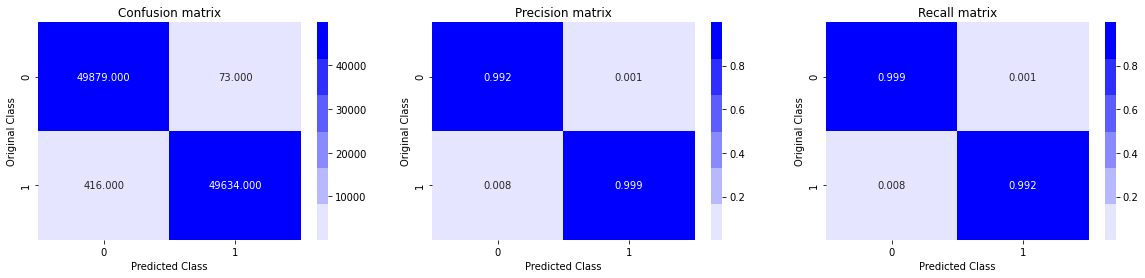

Test confusion_matrix


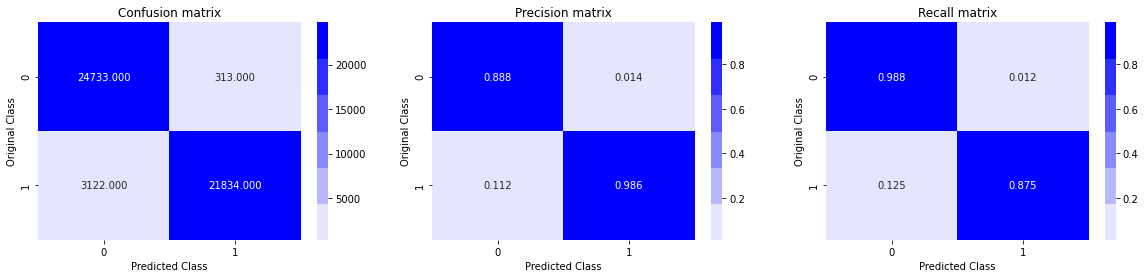

In [136]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

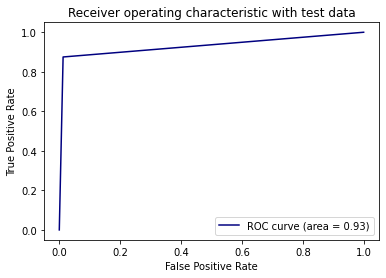

In [137]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

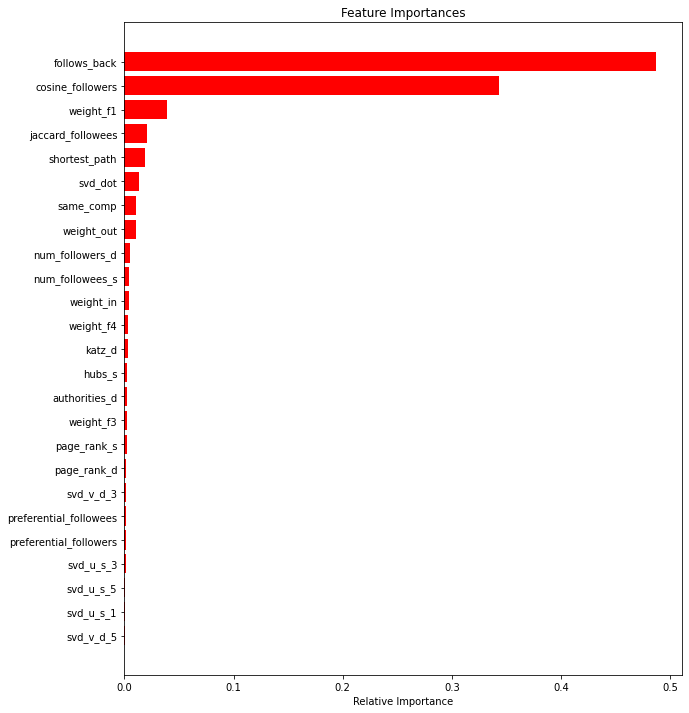

In [148]:
features = df_final_train.columns
importances = clf1.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###observation

In [149]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
x.add_row(['Random Forest','121','14','0.964','0.926'])
x.add_row(['XGBOOST','112','11','0.995','0.927'])
print(x)

+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |     121      |     14    |     0.964      |     0.926     |
|    XGBOOST    |     112      |     11    |     0.995      |     0.927     |
+---------------+--------------+-----------+----------------+---------------+


1) At first we have a dataset with less amount of features and visualized the dataset by using EDA on dataset we visaulized about followers and followees

2) Generated some edges which are not present in graph to pose as supervised learning

3)After that we did feature engineering on dataset like finding Jaccard distance,cosine distance,Ranking measure etc..

4)After we combined all the dataset points and splited into train data and test data

5)And performed RandomForest and XGBoost on dataset and finded metrics confusion matrix and f1_score

6)Finally plotted Confusion_matrix and pretty table in we have mentioned the best parameters and scores